### Ben Porter
### This Lab is open from 11/8 at 6 am to 11/8 at 3:30 pm


We will use Iris data found here https://archive.ics.uci.edu/ml/datasets/Iris. It is one of the most used data sets in Data Science. You can just google or read more about it here https://en.wikipedia.org/wiki/Iris_flower_data_set.

 Let's load the data. The problem here is to classify which kind of flower it is with the values of the following 4 columns: sepal length, sepal width, petal length and petal width. This data set has three labels/species for the flowers: setosa, verginica, and versicolor. We will use Kmeans clustering algorithm to classify the data and see how it compares to supervised algorithms we have done before.

In [1]:
import numpy as np
import numpy.matlib
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
import scipy.stats as st
import matplotlib.colors as colors
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()  # for plot styling

In [2]:
iris = pd.read_csv('iris.csv')
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


Find out how many of each species the data set has.

In [3]:
iris.species.value_counts().to_frame()

,species
virginica,50
setosa,50
versicolor,50


## Problem 1
First, make a scatter plot with x as sepal_length and y as sepal_width and label accordingly.  Then, take x as both sepal_length and sepal_width. Forget about the y variable.  We do NOT need another variable y (the response variable) for kmeans to work. Use kmeans algorithm to find 3 clusters of data. This is becuase we do know that we have 3 kinds of flowers (species) and the hope is that kmeans will find all 3 clusters as accurately as possible. Next, make predictions on x using kmeans and find predictions of y (labels). Finally, make a scatter plot of 3 clusters with their centers. Three clusters should have 3 different colors. (10 points)

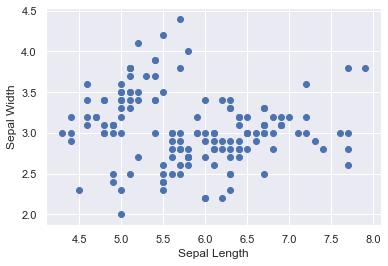

In [4]:
plt.scatter(iris[['sepal_length']], iris[['sepal_width']])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [5]:
kmodel = KMeans(n_clusters=3, random_state=0)
x = iris.iloc[:,[0,1]]
kmodel.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [6]:
ypred= KMeans.predict(kmodel,x)
ypred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

AttributeError: type object 'KMeans' has no attribute 'cluster_centers_'

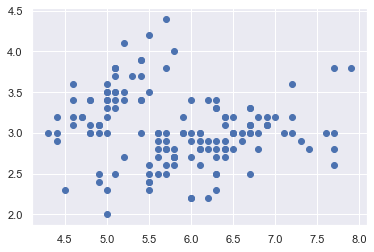

In [7]:
plt.scatter(iris.iloc[:,0], iris.iloc[:,1])
plt.scatter(KMeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

I have no idea why it won't let me use cluster_centers_

### Problem 2
In problem 1, we used kmeans algorithm to find clusters of 3 different kinds of flowers without actually giving the labels out. Let's check now how kmeans did. When we make predictions using kmeans, it will give labels as 0, 1 and 2. Now, let's change the labels of the species in the original data as: setosa - 0, versicolor - 1, and virginica - 2, so that we can see how kmeans did. You will then be able to compare y and predictions of y using k means. FInd the confusion matrix (10 points)

In [8]:
iris1=iris.replace({'setosa': 1,'versicolor': 0,'virginica': 2})

In [9]:
iris1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [10]:
print("Accuracy:",metrics.accuracy_score(iris1[['species']], ypred))
print(confusion_matrix(iris1[['species']], ypred))

Accuracy: 0.82
[[38  0 12]
 [ 0 50  0]
 [15  0 35]]


### Problem 3
Now, use all 4 columns as x to train a new kmeans model. Make predictions on x, report the accuracy score and find the confusion matrix. (15 points)

In [11]:
kmodel1 = KMeans(n_clusters=3, random_state=0)
x1 = iris.iloc[:,[0,3]]
kmodel1.fit(x1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [12]:
ypred1= KMeans.predict(kmodel1,x1)
ypred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2])

In [14]:
iris2=iris.replace({'setosa': 0,'versicolor': 2,'virginica': 1})

In [15]:
print("Accuracy:",metrics.accuracy_score(iris2[['species']], ypred1))
print(confusion_matrix(iris2[['species']], ypred1))

Accuracy: 0.8133333333333334
[[50  0  0]
 [ 0 35 15]
 [ 4  9 37]]


### Problem 4
Use test train method with (75, 25) rule to split the data. Train kmeans model and report the accuracy and confusion matrices for the training and testing sets. (15 points)

In [19]:
x1 = iris.iloc[:,[0,3]]
train, test = train_test_split(x1, test_size=0.25,
random_state=1)
kmodel2 = KMeans(n_clusters=3, random_state=0)
kmodel2.fit(train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [20]:
kmodel3 = KMeans(n_clusters=3, random_state=0)
kmodel3.fit(test)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [21]:
ypred2= KMeans.predict(kmodel2,x1)
ypred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2])

In [22]:
ypred3= KMeans.predict(kmodel3,x1)
ypred3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1])

In [23]:
print("Accuracy:",metrics.accuracy_score(iris2[['species']], ypred2))
print(confusion_matrix(iris2[['species']], ypred2))

Accuracy: 0.8266666666666667
[[50  0  0]
 [ 0 37 13]
 [ 4  9 37]]


In [24]:
print("Accuracy:",metrics.accuracy_score(iris2[['species']], ypred3))
print(confusion_matrix(iris2[['species']], ypred3))

Accuracy: 0.5066666666666667
[[50  0  0]
 [ 0 21 29]
 [ 4 41  5]]
